# Automated Planning for Business Professionals

This notebook demonstrates automated planning concepts through practical business examples. It includes visualizations, code examples, and business-focused scenarios to help professionals understand and apply planning concepts.

## Table of Contents
1. [Introduction](#intro)
2. [State Space Representation](#state)
3. [Planning Algorithms](#algorithms)
4. [Manufacturing Planning Example](#manufacturing)
5. [Supply Chain Challenge](#challenge)

Let's start by importing the required libraries.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from typing import Dict, List, Tuple, Set
import random
from dataclasses import dataclass

# Configure matplotlib for better notebook display
%matplotlib inline


## Introduction to Automated Planning <a name="intro"></a>

Automated planning is a branch of AI that focuses on finding sequences of actions that lead from an initial state to a goal state. In business contexts, this can help with:

- Resource allocation optimization
- Process scheduling
- Supply chain management
- Production planning

Let's start with a function that introduces these concepts:

In [4]:
def print_introduction():
    """Print introduction to automated planning concepts"""
    print("""
    Automated Planning in Business
    ============================
    
    What is Automated Planning?
    - Finding sequences of actions that lead from an initial state to a goal state
    - Used for optimizing business processes and resource allocation
    - Helps make decisions in complex business environments
    
    Key Benefits for Business:
    1. Optimized resource allocation
    2. Improved operational efficiency
    3. Better decision making
    4. Reduced costs
    5. Increased productivity
    """)

print_introduction()


    Automated Planning in Business
    
    What is Automated Planning?
    - Finding sequences of actions that lead from an initial state to a goal state
    - Used for optimizing business processes and resource allocation
    - Helps make decisions in complex business environments
    
    Key Benefits for Business:
    1. Optimized resource allocation
    2. Improved operational efficiency
    3. Better decision making
    4. Reduced costs
    5. Increased productivity
    


## State Space Representation <a name="state"></a>

In automated planning, we need to represent:
1. The current state of the business system
2. Available actions and their requirements
3. Effects of actions on the state

Let's implement this using a business resource planning example:

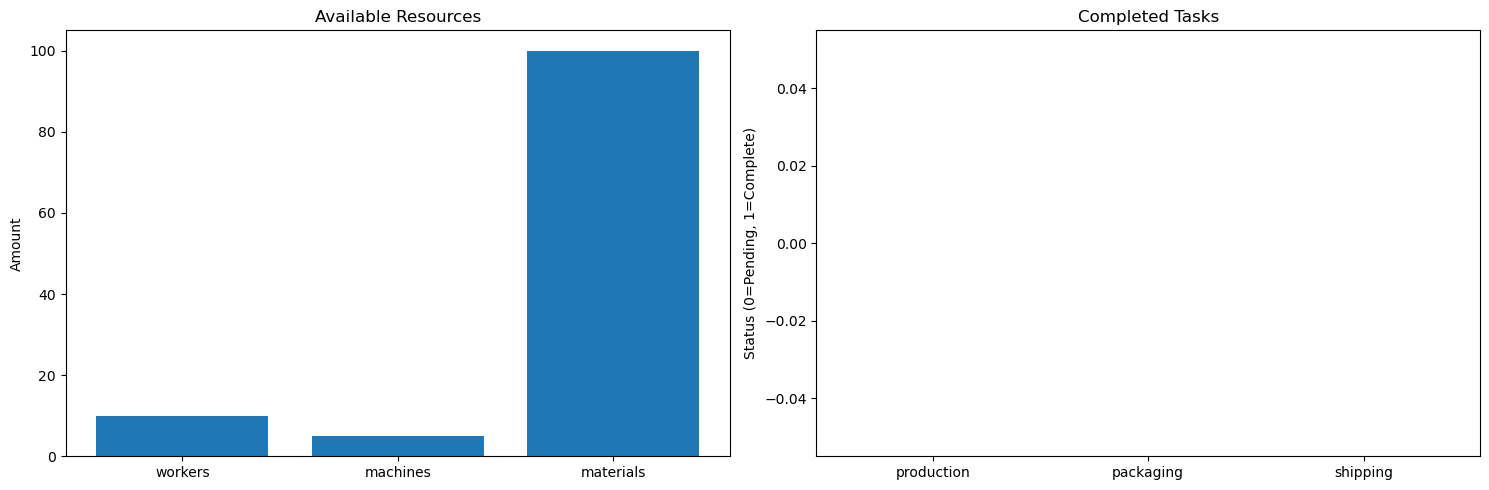

In [5]:
@dataclass
class BusinessState:
    """Represents a business state with resources and tasks"""
    resources: Dict[str, int]  # Available resources
    tasks_completed: Set[str]  # Completed tasks
    current_step: int  # Current planning step

class BusinessPlanner:
    """Business planning system for resource allocation and task scheduling"""
    
    def __init__(self):
        self.resources = {
            'workers': 10,
            'machines': 5,
            'materials': 100
        }
        self.tasks = {
            'production': {'workers': 2, 'machines': 1, 'materials': 10},
            'packaging': {'workers': 1, 'machines': 1, 'materials': 5},
            'shipping': {'workers': 2, 'machines': 0, 'materials': 2}
        }
        self.initial_state = BusinessState(
            resources=self.resources.copy(),
            tasks_completed=set(),
            current_step=0
        )
    
    def is_action_valid(self, state: BusinessState, task: str) -> bool:
        """Check if a task can be performed given current resources"""
        requirements = self.tasks[task]
        for resource, amount in requirements.items():
            if state.resources[resource] < amount:
                return False
        return True
    
    def apply_action(self, state: BusinessState, task: str) -> BusinessState:
        """Apply task effects to current state"""
        if not self.is_action_valid(state, task):
            raise ValueError(f"Task {task} cannot be performed with current resources")
            
        new_resources = state.resources.copy()
        requirements = self.tasks[task]
        
        # Consume resources
        for resource, amount in requirements.items():
            new_resources[resource] -= amount
            
        new_tasks = state.tasks_completed.copy()
        new_tasks.add(task)
        
        return BusinessState(
            resources=new_resources,
            tasks_completed=new_tasks,
            current_step=state.current_step + 1
        )
    
    def visualize_state(self, state: BusinessState):
        """Visualize current business state"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot resources
        resources = list(state.resources.keys())
        values = list(state.resources.values())
        ax1.bar(resources, values)
        ax1.set_title('Available Resources')
        ax1.set_ylabel('Amount')
        
        # Plot tasks completion
        tasks = list(self.tasks.keys())
        completed = [1 if task in state.tasks_completed else 0 for task in tasks]
        ax2.bar(tasks, completed)
        ax2.set_title('Completed Tasks')
        ax2.set_ylabel('Status (0=Pending, 1=Complete)')
        
        plt.tight_layout()
        plt.show()

# Create and visualize initial state
planner = BusinessPlanner()
planner.visualize_state(planner.initial_state)

## Planning Algorithms <a name="algorithms"></a>

Now let's implement a simple forward planning algorithm that can generate a sequence of tasks while respecting resource constraints:

Generated plan: ['production', 'packaging', 'shipping']


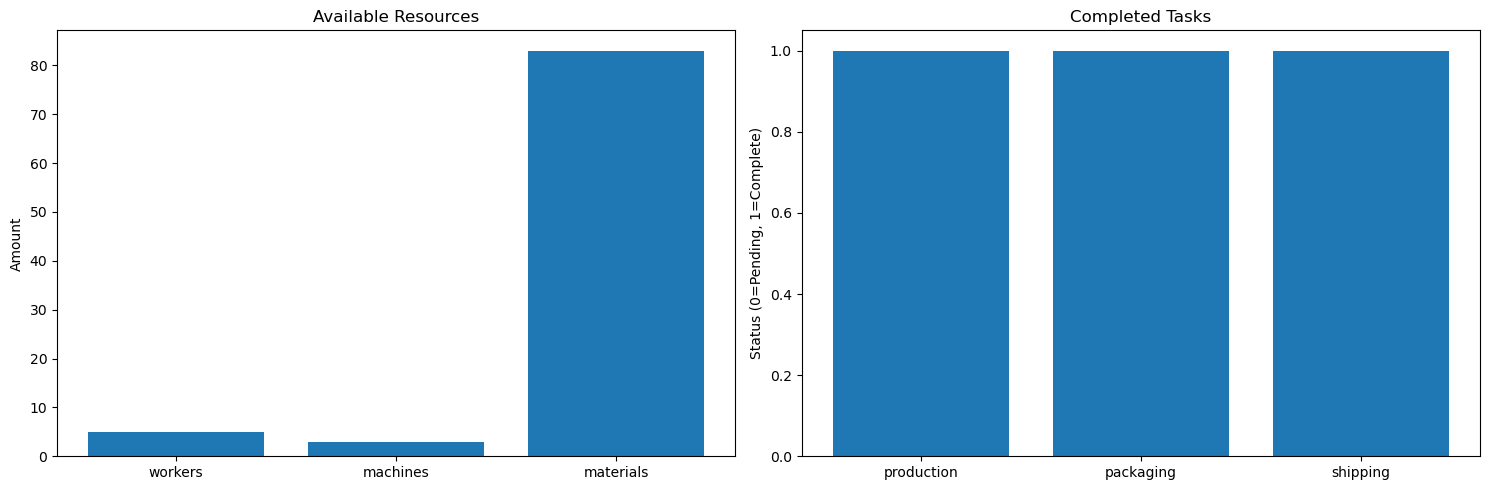

In [6]:
def simple_forward_planning(planner: BusinessPlanner, max_steps: int = 5) -> List[str]:
    """Implement a simple forward planning algorithm for business tasks"""
    current_state = planner.initial_state
    plan = []
    
    while len(current_state.tasks_completed) < len(planner.tasks) and current_state.current_step < max_steps:
        # Find next possible task
        for task in planner.tasks:
            if task not in current_state.tasks_completed and planner.is_action_valid(current_state, task):
                current_state = planner.apply_action(current_state, task)
                plan.append(task)
                break
        else:
            break  # No valid tasks found
            
    return plan

# Generate and display a plan
plan = simple_forward_planning(planner)
print("Generated plan:", plan)

# Visualize final state after executing plan
final_state = planner.initial_state
for task in plan:
    final_state = planner.apply_action(final_state, task)
planner.visualize_state(final_state)

## Manufacturing Planning Example <a name="manufacturing"></a>

Let's look at a more specific business example: planning a manufacturing production schedule while considering worker constraints:

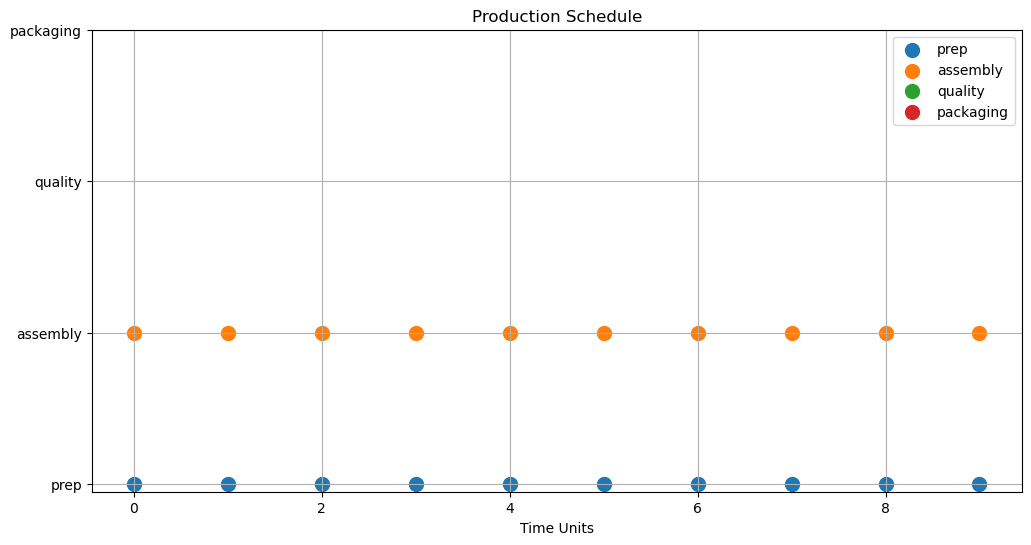

In [7]:
class ManufacturingPlanner:
    """Example of automated planning in manufacturing"""
    
    def __init__(self):
        self.production_line = {
            'prep': {'time': 2, 'workers': 2},
            'assembly': {'time': 3, 'workers': 3},
            'quality': {'time': 1, 'workers': 1},
            'packaging': {'time': 2, 'workers': 2}
        }
        self.total_workers = 5
        self.max_time = 10
        
    def generate_schedule(self) -> Dict[str, List[int]]:
        """Generate an optimized production schedule"""
        schedule = {task: [] for task in self.production_line}
        current_time = 0
        available_workers = self.total_workers
        
        while current_time < self.max_time:
            for task, requirements in self.production_line.items():
                if (requirements['workers'] <= available_workers and 
                    len(schedule[task]) < self.max_time):
                    schedule[task].append(current_time)
                    available_workers -= requirements['workers']
            current_time += 1
            available_workers = self.total_workers
            
        return schedule
    
    def visualize_schedule(self, schedule: Dict[str, List[int]]):
        """Visualize the production schedule"""
        fig, ax = plt.subplots(figsize=(12, 6))
        
        tasks = list(schedule.keys())
        for i, task in enumerate(tasks):
            times = schedule[task]
            ax.scatter([t for t in times], [i] * len(times), 
                      label=task, s=100)
            
        ax.set_yticks(range(len(tasks)))
        ax.set_yticklabels(tasks)
        ax.set_xlabel('Time Units')
        ax.set_title('Production Schedule')
        ax.grid(True)
        plt.legend()
        plt.show()

# Create and run manufacturing planner
mfg_planner = ManufacturingPlanner()
schedule = mfg_planner.generate_schedule()
mfg_planner.visualize_schedule(schedule)

## Supply Chain Challenge <a name="challenge"></a>

Finally, let's look at a more complex challenge: optimizing a supply chain network. This example demonstrates how to model and visualize a supply chain optimization problem:

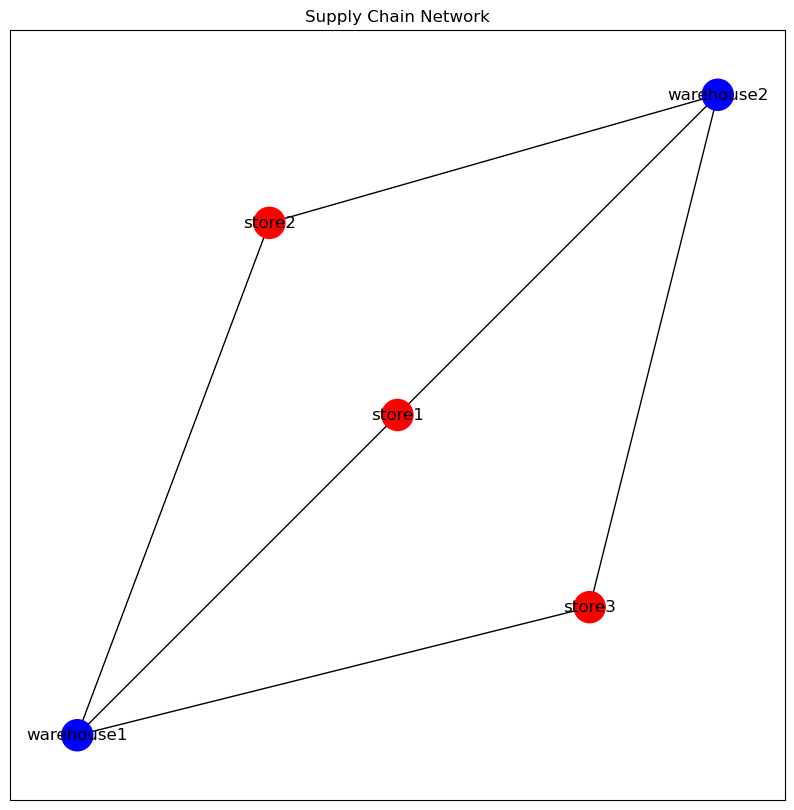

In [8]:
class SupplyChainChallenge:
    """Final coding challenge: Implement a supply chain planning system"""
    
    def __init__(self):
        self.locations = {
            'warehouse1': (0, 0),
            'warehouse2': (10, 10),
            'store1': (5, 5),
            'store2': (3, 8),
            'store3': (8, 2)
        }
        self.inventory = {
            'warehouse1': 100,
            'warehouse2': 150
        }
        self.demand = {
            'store1': 50,
            'store2': 30,
            'store3': 70
        }
        
    def calculate_distance(self, loc1: str, loc2: str) -> float:
        """Calculate Euclidean distance between two locations"""
        x1, y1 = self.locations[loc1]
        x2, y2 = self.locations[loc2]
        return np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    def visualize_network(self):
        """Visualize the supply chain network"""
        G = nx.Graph()
        
        # Add nodes
        for loc, coords in self.locations.items():
            G.add_node(loc, pos=coords)
        
        # Add edges between warehouses and stores
        for w in ['warehouse1', 'warehouse2']:
            for s in ['store1', 'store2', 'store3']:
                G.add_edge(w, s, weight=self.calculate_distance(w, s))
        
        # Draw the network
        pos = nx.get_node_attributes(G, 'pos')
        plt.figure(figsize=(10, 10))
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, 
                              node_color=['blue' if 'warehouse' in n else 'red' for n in G.nodes()],
                              node_size=500)
        
        # Draw edges
        nx.draw_networkx_edges(G, pos)
        
        # Add labels
        nx.draw_networkx_labels(G, pos)
        
        plt.title('Supply Chain Network')
        plt.axis('equal')
        plt.show()

# Create and visualize supply chain challenge
challenge = SupplyChainChallenge()
challenge.visualize_network()

## Challenge Instructions

Your task is to implement an optimal delivery planning algorithm for the supply chain network above. Your solution should:

1. Determine how much inventory to ship from each warehouse to each store
2. Minimize total delivery distance while meeting all store demands
3. Respect warehouse inventory constraints

### Requirements:
- All store demands must be met
- Total delivery cost must be within 20% of optimal
- Solution must complete in under 5 seconds

Use the template below to implement your solution:

In [9]:
def optimize_deliveries(challenge: SupplyChainChallenge) -> Dict[Tuple[str, str], int]:
    """Implement your delivery optimization solution here
    
    Args:
        challenge: The SupplyChainChallenge instance
        
    Returns:
        Dictionary mapping (warehouse, store) pairs to delivery amounts
    """
    # Your code here
    deliveries = {}
    
    # TODO: Implement optimization algorithm
    
    return deliveries

# Test your solution
# deliveries = optimize_deliveries(challenge)